In [1]:
import mercury as mr
app = mr.App(title="Performance Benchmarks", description="Collated Performance Benchmarks", show_code=False)

mercury.App

In [2]:
all_flag = mr.Checkbox(value=False, label="Compare all")
ovo_flag = mr.Checkbox(value=False, label="Compare 1 vs 1")
com_task_flag = mr.Checkbox(value=False, label="Compare between tasks")
mgpu_flag = mr.Checkbox(value=False, label="Multi-GPU")

mercury.Checkbox

mercury.Checkbox

mercury.Checkbox

mercury.Checkbox

mercury.Select

mercury.Select

mercury.Select

mercury.Select

mercury.Slider

Performance benchmarks of task: Heisenberg dynamics, with compute capability: Singlethread, precision: Single


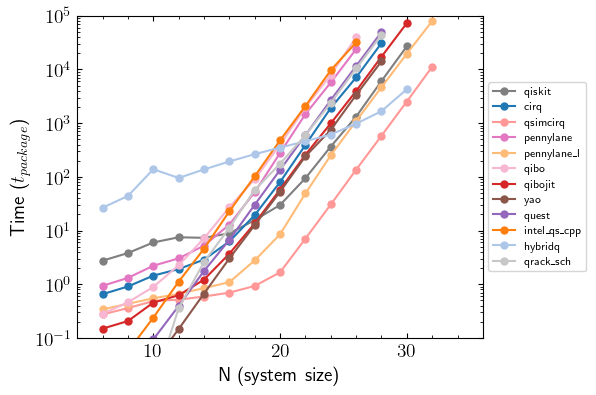

 -------------------------------------------------------- 
 Comparison to the selected package 


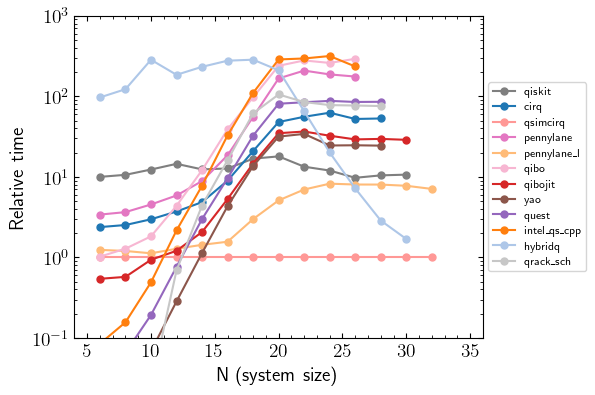

In [5]:
import os
ps_path = os.getcwd() + '/plot_scripts'

if [all_flag.value, ovo_flag.value, com_task_flag.value, mgpu_flag.value].count(True) > 1:
    print("Select only one option!")

elif all_flag.value == True:
    import numpy as np
    import h5py
    import os

    import sys
    sys.path.append(ps_path)
    from map_packages_colors_all import *
    from plot_scripts_all import *
    from plot_display_all import *
    
    task = mr.Select(label="Select Task: ", value="Heisenberg dynamics", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"])
    
    com_cap = mr.Select(label="Select Compute Capability: ", value="Singlethread", choices=["Singlethread", "Multithread", "GPU"])
    
    prec = mr.Select(label="Select Precision : ", value="Single", choices=["Single", "Double"])
    
    com_pack = mr.Select(label="Select Package to compare: ", value="qsimcirq", choices=['qiskit' , 'cirq', 'qsimcirq', 'pennylane', 'pennylane_l', 'qibo', 'qibojit', 'yao', 'quest', 'qulacs', 'intel_qs_cpp', 'projectq', 'svsim',  'hybridq', 'hiq', 'qcgpu', 'qrack_sch', 'cuquantum_qiskit', 'cuquantum_qsimcirq', 'qpanda'])
    
    # if task.value == "Heisenberg dynamics" or task.value == "Quantum Fourier Transform":
    #     N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
    # elif task.value == "Random Quantum Circuit":
    #     N_slider = mr.Slider(value=N_slider.value, min=12, max=36, label="Select System size: ", step=2)
    N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
    if task.value == "Random Quantum Circuit" and N_slider.value < 12:
        print("Please select a different final N value")
    else:
        print('Performance benchmarks of task: {}, with compute capability: {}, precision: {}'.format(task.value, com_cap.value, prec.value))
    
        abs_time(task.value, com_cap.value, prec.value, com_pack.value, N_slider.value+2)
    
elif ovo_flag.value == True:
    import numpy as np
    import h5py
    import os

    import sys
    sys.path.append(ps_path)
    from map_packages_colors_1v1 import *
    from plot_scripts_1v1 import *
    from plot_display_1v1 import *
    
    task = mr.Select(label="Select Task I:", value="Heisenberg dynamics", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"])
    
    pack = mr.Select(label="Select Package I:", value="qsimcirq", choices=['qiskit' , 'cirq', 'qsimcirq', 'pennylane', 'pennylane_l', 'qibo', 'qibojit', 'yao', 'quest', 'qulacs', 'intel_qs_cpp', 'projectq', 'svsim',  'hybridq', 'hiq', 'qcgpu', 'qrack_sch', 'cuquantum_qiskit', 'cuquantum_qsimcirq', 'qpanda'])
    
    com_cap = mr.Select(label="Select Compute Capability I:", value="Singlethread", choices=["Singlethread", "Multithread", "GPU"])
    
    prec = mr.Select(label="Select Precision I:", value="Single", choices=["Single", "Double"])
        
    # print("----------------------------------------------------------------")
    
    task_2 = mr.Select(label="Select Task II:", value="Random Quantum Circuit", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"])

    pack_2 = mr.Select(label="Select Package to compare: ", value="qsimcirq", choices=['qiskit' , 'cirq', 'qsimcirq', 'pennylane', 'pennylane_l', 'qibo', 'qibojit', 'yao', 'quest', 'qulacs', 'intel_qs_cpp', 'projectq', 'svsim',  'hybridq', 'hiq', 'qcgpu', 'qrack_sch', 'cuquantum_qiskit', 'cuquantum_qsimcirq', 'qpanda'])
    
    com_cap_2 = mr.Select(label="Select Compute Capability II:", value="Singlethread", choices=["Singlethread", "Multithread", "GPU"])
    
    prec_2 = mr.Select(label="Select Precision II:", value="Single", choices=["Single", "Double"])
    
    # if task.value == "Heisenberg dynamics" or task.value == "Quantum Fourier Transform":
    #     N_slider = mr.Slider(value=slider_glob, min=6, max=36, label="Select System size: ", step=2)
    # elif task.value == "Random Quantum Circuit":
    #     N_slider = mr.Slider(value=slider_glob, min=12, max=36, label="Select System size: ", step=2)

    N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
    if (task.value == "Random Quantum Circuit" or task_2.value == "Random Quantum Circuit") and N_slider.value < 12:
        print("Please select a different final N value")
    else:
        print("Absolute Time")
        abs_time(task.value, pack.value, com_cap.value, prec.value, task_2.value, pack_2.value, com_cap_2.value, prec_2.value, N_slider.value+2)
        print("Relative Time")
        relative_time_wrt_pack(task.value, pack.value, com_cap.value, prec.value, task_2.value, pack_2.value, com_cap_2.value, prec_2.value, N_slider.value+2)
    
elif com_task_flag.value == True:
    import numpy as np
    import h5py
    import os

    import sys
    sys.path.append(ps_path)
    from map_packages_colors_all import *
    from plot_scripts_all import *
    from plot_display_com_pack import *
    
    task_1 = mr.Select(label="Select Task I:", value="Heisenberg dynamics", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"]) 
    task_2 = mr.Select(label="Select Task II:", value="Random Quantum Circuit", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"])
    
    # print(task_1.value)
    # print(task_2.value)
    
    com_cap = mr.Select(label="Select Compute Capability:", value="Singlethread", choices=["Singlethread", "Multithread", "GPU"]) 
    
    prec = mr.Select(label="Select Precision:", value="Single", choices=["Single", "Double"])
    
    # if task_1.value == "Heisenberg dynamics" or task_1.value == "Quantum Fourier Transform":
    #     N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
    # elif task_1.value == "Random Quantum Circuit":
    #     N_slider = mr.Slider(value=36, min=12, max=36, label="Select System size: ", step=2)
    
    # if task_2.value == "Heisenberg dynamics" or task_2.value == "Quantum Fourier Transform":
    #     N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
    # elif task_2.value == "Random Quantum Circuit":
    #     N_slider = mr.Slider(value=N_slider.value, min=12, max=36, label="Select System size: ", step=2)
    
    N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
    if task_2.value == "Random Quantum Circuit" and N_slider.value < 12:
        print("Please select a different final N value")
    else:
        abs_time_pack(task_1.value, task_2.value, com_cap.value, prec.value, N_slider.value+2)
    
elif mgpu_flag.value == True:
    import numpy as np
    import h5py
    import os

    import sys
    sys.path.append(ps_path)
    from map_packages_colors_mgpu import *
    from plot_scripts_mgpu import *
    from plot_display_mgpu import *
    
    gpu_all_flag = mr.Checkbox(value=False, label="Compare all")
    ngpu_flag = mr.Checkbox(value=False, label="Scaling with N GPU's")

    if gpu_all_flag.value == True and ngpu_flag.value == True:
        print("Select only one option!")
    
    elif gpu_all_flag.value == True:
        
        task = mr.Select(label="Select Task:", value="Heisenberg dynamics", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"])
        prec = mr.Select(label="Select Precision:", value="Single", choices=["Single", "Double"])
        n_gpu = mr.Select(label="Select no. of GPUs:", value=1, choices=[1, 2, 4, 8])
        
        compare_to = mr.Select(label="Select package to compare to:", choices=["cuquantum_qiskit", "cuquantum_qsimcirq", "qibojit"])

        # if task.value == "Heisenberg dynamics" or task.value == "Quantum Fourier Transform":
        #     N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
        # elif task.value == "Random Quantum Circuit":
        #     N_slider = mr.Slider(value=N_slider.value, min=12, max=36, label="Select System size: ", step=2)

        N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
        if task.value == "Random Quantum Circuit" and N_slider.value < 12:
            print("Please select a different final N value")
        else:
            abs_time(task.value, prec.value, n_gpu.value, compare_to.value, N_slider.value+2)
        
        
    elif ngpu_flag.value == True:
        pack = mr.Select(label="Select package:", value="cuquantum_qiskit", choices=["cuquantum_qiskit", "cuquantum_qsimcirq", "qibojit"])
        task = mr.Select(label="Select Task:", value="Heisenberg dynamics", choices=["Heisenberg dynamics", "Random Quantum Circuit", "Quantum Fourier Transform"])
        prec = mr.Select(label="Select Precision:", value="Single", choices=["Single", "Double"])
        
        compare_n_gpu = mr.Select(label="Compare to no. of GPUs:", value=1, choices=[1, 2, 4, 8])

        # if task.value == "Heisenberg dynamics" or task.value == "Quantum Fourier Transform":
        #     N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
        # elif task.value == "Random Quantum Circuit":
        #     N_slider = mr.Slider(value=N_slider.value, min=12, max=36, label="Select System size: ", step=2)
        
        N_slider = mr.Slider(value=36, min=6, max=36, label="Select System size: ", step=2)
        if task.value == "Random Quantum Circuit" and N_slider.value < 12:
            print("Please select a different final N value")
        else:
            abs_time_ngpus(task.value, prec.value, pack.value, compare_n_gpu.value, N_slider.value+2)
